## Importing liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Load the dataset

In [2]:
dt = pd.read_csv('advertising.csv')

In [3]:
print("\nDataset Info:")
dt.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
print("\nFirst 5 Rows:")
print(dt.head())


First 5 Rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
# Check for missing values
print("\nMissing Values:")
print(dt.isnull().sum())


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## 2. Exploratory Data Analysis (EDA)

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


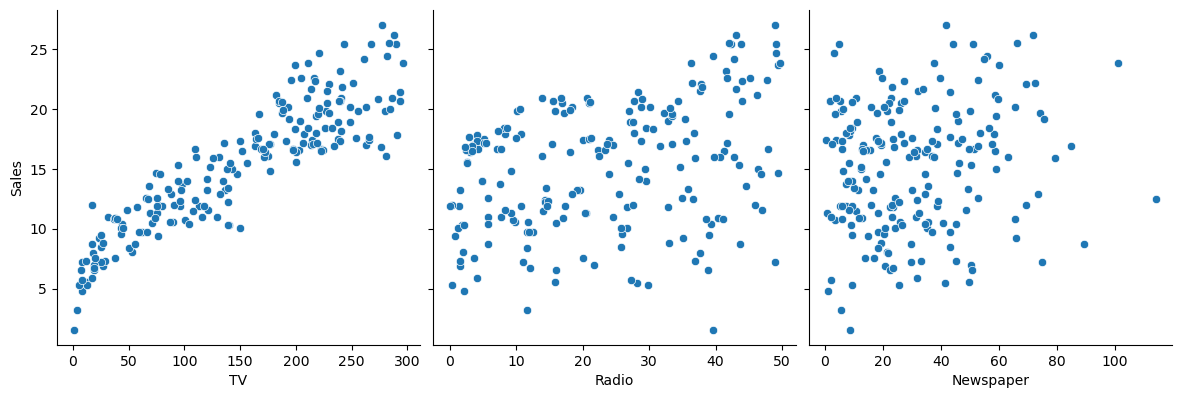

In [6]:
sns.pairplot(dt, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

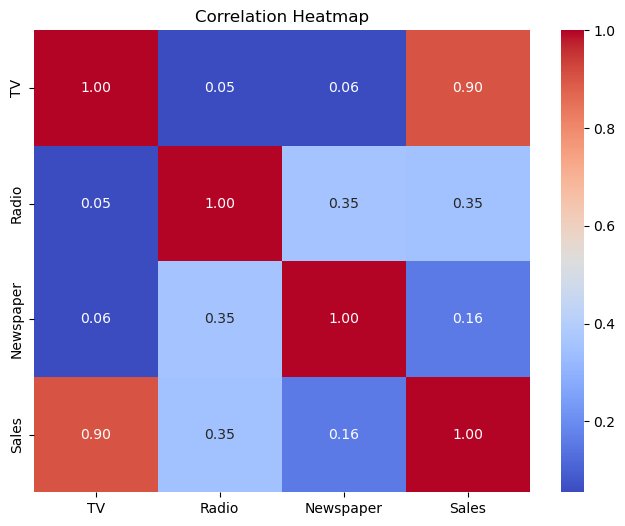

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 3. Build the regression model

In [8]:
# Select predictor (TV) and target (Sales)
X = dt[['TV']]
y = dt['Sales']

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. Evaluate the model

In [11]:
# Predictions
y_pred = model.predict(X_test)

In [12]:
# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [13]:
print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
RMSE: 2.47
R-squared: 0.80


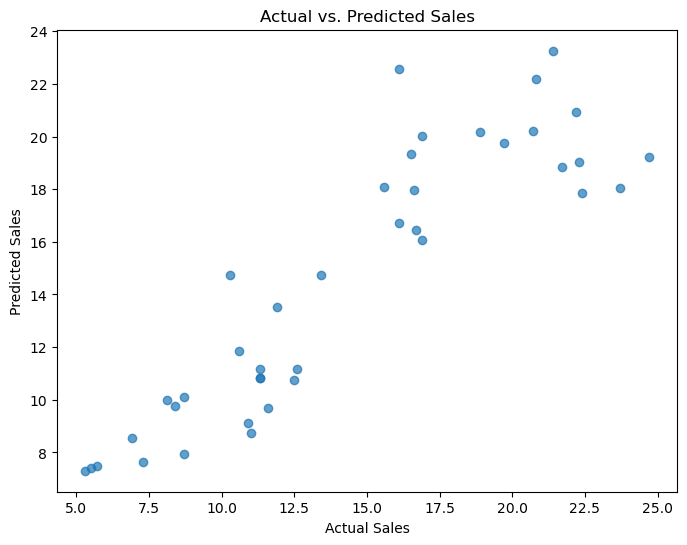

In [14]:
# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

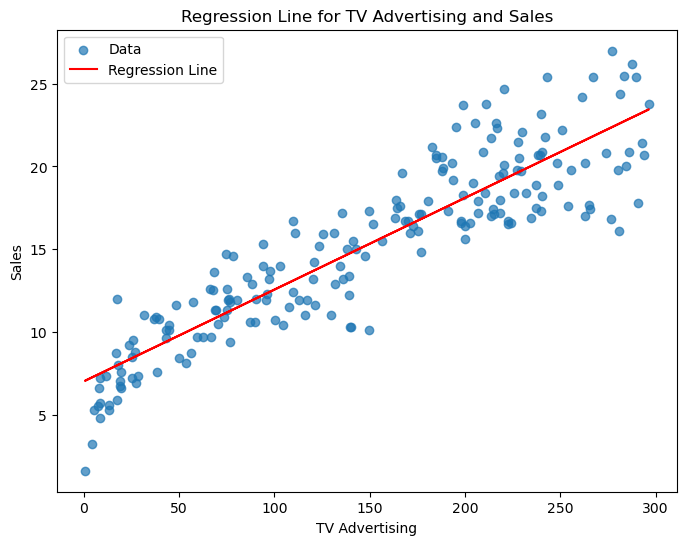

In [15]:
# Regression line visualization
plt.figure(figsize=(8, 6))
plt.scatter(dt['TV'], dt['Sales'], alpha=0.7, label='Data')
plt.plot(dt['TV'], model.predict(dt[['TV']]), color='red', label='Regression Line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Regression Line for TV Advertising and Sales')
plt.legend()
plt.show()